## RQ1: What is the distribution of positive, negative, and neutral sentiments among reviews for apartment-type Airbnb accommodations in London, and what specific words or phrases are most frequently mentioned in these reviews?

## Import library

In [1]:
import pandas as pd
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.tokenize import word_tokenize


**Note:** Data has been already pre-processed 

- sensitivity score for each comment by using VADER

In [2]:
# Load the dataset
language_reviews_path = 'spelling_corrected_reviews.csv'
language_reviews_df = pd.read_csv(language_reviews_path)

# Strip leading/trailing spaces from column names
language_reviews_df.columns = language_reviews_df.columns.str.strip()

# Function to preprocess text (remove punctuation, lowercase, remove stop words)
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

# Apply preprocessing to the comments
language_reviews_df['processed_comments'] = language_reviews_df['comments'].apply(preprocess_text)

# Compute word frequencies
all_words = ' '.join(language_reviews_df['processed_comments']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Display the most common words
print("Most common words:")
for word, freq in common_words:
    print(f"{word}: {freq}")

Most common words:
great: 15903
stay: 14811
location: 13198
apartment: 12654
place: 10406
clean: 9539
good: 7437
onion: 7366
host: 6338
nice: 6322
recommend: 5317
flat: 5292
easy: 4752
close: 4667
comfortable: 4511
perfect: 4372
station: 4189
really: 4094
room: 3955
definitely: 3516


## TextBlob (Default) - wording analysis

In [3]:
# Function to classify comments as positive or negative
def classify_sentiment(text):
    analysis = TextBlob(text)
    return 'positive' if analysis.sentiment.polarity > 0 else 'negative'

# Classify comments
language_reviews_df['sentiment'] = language_reviews_df['processed_comments'].apply(classify_sentiment)

# Separate positive and negative comments
positive_comments = ' '.join(language_reviews_df[language_reviews_df['sentiment'] == 'positive']['processed_comments']).split()
negative_comments = ' '.join(language_reviews_df[language_reviews_df['sentiment'] == 'negative']['processed_comments']).split()

# Compute word frequencies for positive and negative comments
positive_word_freq = Counter(positive_comments)
negative_word_freq = Counter(negative_comments)

top_positive_words = positive_word_freq.most_common(20)
top_negative_words = negative_word_freq.most_common(20)

# Display the top words for positive and negative reviews
print("Top words in positive reviews:")
for word, freq in top_positive_words:
    print(f"{word}: {freq}")

print("\nTop words in negative reviews:")
for word, freq in top_negative_words:
    print(f"{word}: {freq}")

Top words in positive reviews:
great: 15842
stay: 14420
location: 12912
apartment: 12054
place: 10063
clean: 9415
good: 7339
onion: 7225
nice: 6260
host: 6019
recommend: 5166
flat: 5127
easy: 4725
close: 4512
comfortable: 4478
perfect: 4362
station: 4076
really: 3959
room: 3597
definitely: 3449

Top words in negative reviews:
apartment: 600
stay: 391
room: 358
place: 343
host: 319
location: 286
bed: 247
small: 235
dirty: 219
bathroom: 210
didnt: 196
like: 194
did: 189
night: 179
just: 175
accommodation: 173
time: 172
flat: 165
airing: 157
shower: 156


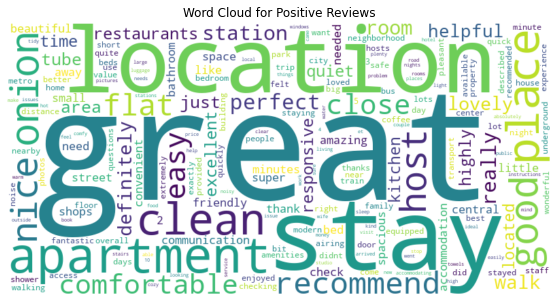

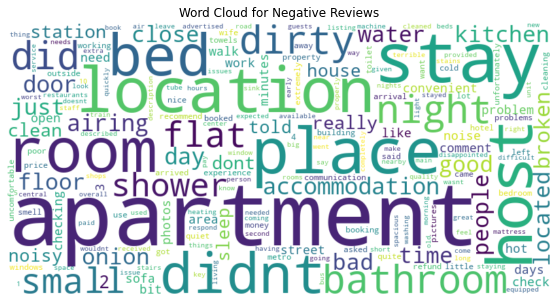

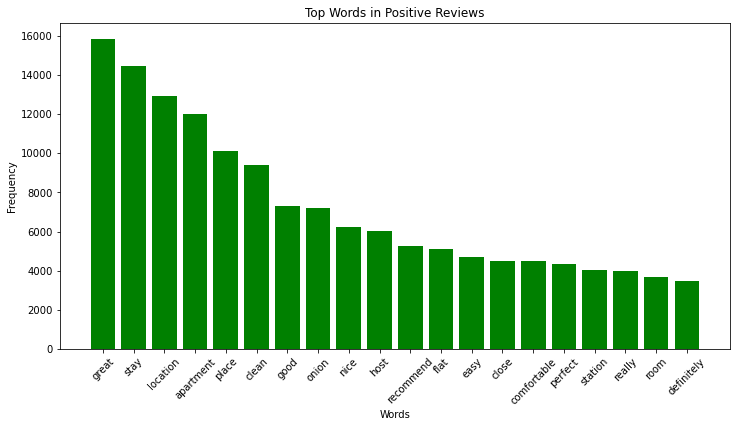

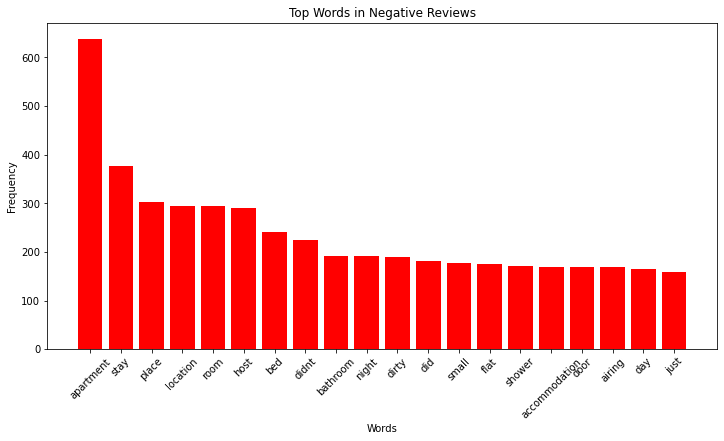

In [10]:
# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq)

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

# Create bar charts
positive_words_df = pd.DataFrame(top_positive_words, columns=['word', 'frequency'])
negative_words_df = pd.DataFrame(top_negative_words, columns=['word', 'frequency'])

plt.figure(figsize=(12, 6))
plt.bar(positive_words_df['word'], positive_words_df['frequency'], color='green')
plt.title('Top Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(negative_words_df['word'], negative_words_df['frequency'], color='red')
plt.title('Top Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## VADER (default) - wording analysis

In [4]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify comments as positive or negative using VADER
def classify_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    return 'positive' if score['compound'] > 0 else 'negative'

# Classify comments
language_reviews_df['sentiment'] = language_reviews_df['processed_comments'].apply(classify_sentiment_vader)

# Separate positive and negative comments
positive_comments = ' '.join(language_reviews_df[language_reviews_df['sentiment'] == 'positive']['processed_comments']).split()
negative_comments = ' '.join(language_reviews_df[language_reviews_df['sentiment'] == 'negative']['processed_comments']).split()

# Compute word frequencies for positive and negative comments
positive_word_freq = Counter(positive_comments)
negative_word_freq = Counter(negative_comments)

top_positive_words = positive_word_freq.most_common(20)
top_negative_words = negative_word_freq.most_common(20)

# Display the top words for positive and negative reviews
print("Top words in positive reviews:")
for word, freq in top_positive_words:
    print(f"{word}: {freq}")

print("\nTop words in negative reviews:")
for word, freq in top_negative_words:
    print(f"{word}: {freq}")


Top words in positive reviews:
great: 15851
stay: 14434
location: 12904
apartment: 12015
place: 10104
clean: 9419
good: 7287
onion: 7223
nice: 6253
host: 6047
recommend: 5251
flat: 5117
easy: 4725
close: 4517
comfortable: 4487
perfect: 4354
station: 4066
really: 3967
room: 3661
definitely: 3489

Top words in negative reviews:
apartment: 639
stay: 377
place: 302
location: 294
room: 294
host: 291
bed: 240
didnt: 225
bathroom: 192
night: 191
dirty: 189
did: 182
small: 177
flat: 175
shower: 171
accommodation: 169
door: 169
airing: 169
day: 165
just: 158


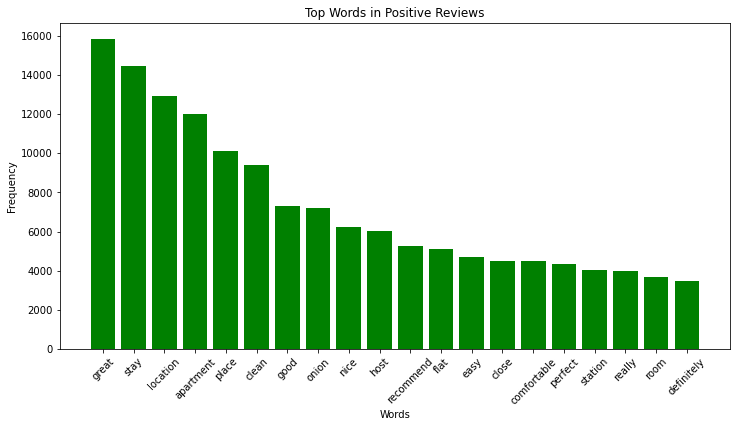

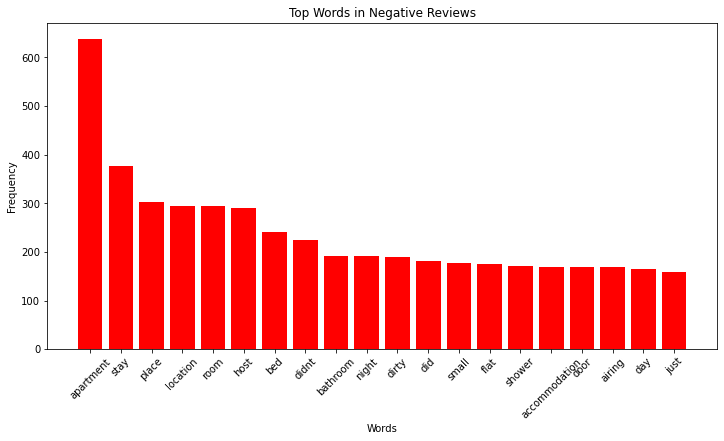

In [5]:
# Create bar charts
positive_words_df = pd.DataFrame(top_positive_words, columns=['word', 'frequency'])
negative_words_df = pd.DataFrame(top_negative_words, columns=['word', 'frequency'])

plt.figure(figsize=(12, 6))
plt.bar(positive_words_df['word'], positive_words_df['frequency'], color='green')
plt.title('Top Words in Positive Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(negative_words_df['word'], negative_words_df['frequency'], color='red')
plt.title('Top Words in Negative Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Custom VADER lexicon

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/babyaimy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/babyaimy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top words in positive reviews:
great: 15846
stay: 14429
location: 12917
apartment: 12075
place: 10098
clean: 9420
good: 7285
onion: 7227
would: 6729
nice: 6256
host: 6051
well: 5390
recommend: 5247
everything: 5143
flat: 5123
easy: 4722
close: 4525
comfortable: 4485
perfect: 4352
station: 4071

Top words in negative reviews:
apartment: 579
stay: 382
place: 308
host: 287
room: 285
location: 281
would: 264
us: 238
one: 233
didnt: 221
bed: 219
night: 193
dirty: 190
also: 182
bathroom: 181
airing: 176
shower: 173
small: 172
door: 171
flat: 169


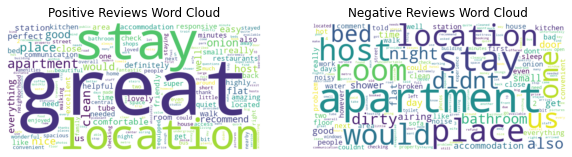

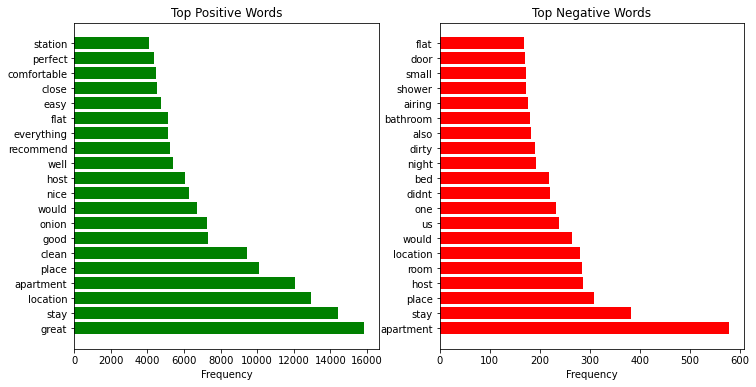

In [16]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load the dataset
language_reviews_path = 'spelling_corrected_reviews.csv'
language_custom = pd.read_csv(language_reviews_path)

# Fix the column name
language_custom.rename(columns=lambda x: x.strip(), inplace=True)

# Function to clean text and remove stop words
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lower case
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

# Apply text cleaning
language_custom['processed_comments'] = language_custom['comments'].apply(clean_text)

# Custom lexicon dictionary
custom_lexicon = {
    "good": 2.0,
    "bad": -2.0,
    "excellent": 3.0,
    "poor": -3.0,
    "amazing": 3.0,
    "awesome": 3.0,
    "fantastic": 3.0,
    "great": 2.5,
    "wonderful": 3.0,
    "love": 3.0,
    "perfect": 3.0,
    "superb": 3.0,
    "terrific": 3.0,
    "satisfactory": 1.5,
    "delightful": 2.5,
    "happy": 2.0,
    "pleased": 2.0,
    "excellent service": 3.5,
    "highly recommend": 3.5,
    "top-notch": 3.0,
    "terrible": -3.0,
    "awful": -3.0,
    "horrible": -3.0,
    "disgusting": -3.0,
    "hate": -3.0,
    "unacceptable": -2.5,
    "disappointing": -2.0,
    "poor service": -3.5,
    "not recommend": -3.0,
    "waste": -2.5,
    "regret": -2.5,
    "bad experience": -3.0,
    "never again": -3.0,
    "frustrating": -2.0,
    "worst": -3.0,
    "average": 0.0,
    "ok": 0.0,
    "mediocre": -0.5,
    "sufficient": 0.5,
    # Add more words/phrases as needed
}

# Function to update VADER lexicon
def update_vader_lexicon():
    vader_lexicon = SentimentIntensityAnalyzer().lexicon
    vader_lexicon.update(custom_lexicon)
    return SentimentIntensityAnalyzer()

# Initialize the updated VADER sentiment analyzer
analyzer = update_vader_lexicon()

# Function to classify comments as positive or negative using VADER
def classify_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    return 'positive' if score['compound'] > 0 else 'negative'

# Classify comments
language_custom['sentiment'] = language_custom['processed_comments'].apply(classify_sentiment_vader)

# Separate positive and negative comments
positive_comments = ' '.join(language_custom[language_custom['sentiment'] == 'positive']['processed_comments']).split()
negative_comments = ' '.join(language_custom[language_custom['sentiment'] == 'negative']['processed_comments']).split()

# Compute word frequencies for positive and negative comments
positive_word_freq = Counter(positive_comments)
negative_word_freq = Counter(negative_comments)

top_positive_words = positive_word_freq.most_common(20)
top_negative_words = negative_word_freq.most_common(20)

# Display the top words for positive and negative reviews
print("Top words in positive reviews:")
for word, freq in top_positive_words:
    print(f"{word}: {freq}")

print("\nTop words in negative reviews:")
for word, freq in top_negative_words:
    print(f"{word}: {freq}")

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

# Create bar charts
positive_words, positive_freqs = zip(*top_positive_words)
negative_words, negative_freqs = zip(*top_negative_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(positive_words, positive_freqs, color='green')
plt.xlabel('Frequency')
plt.title('Top Positive Words')

plt.subplot(1, 2, 2)
plt.barh(negative_words, negative_freqs, color='red')
plt.xlabel('Frequency')
plt.title('Top Negative Words')
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/babyaimy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/babyaimy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


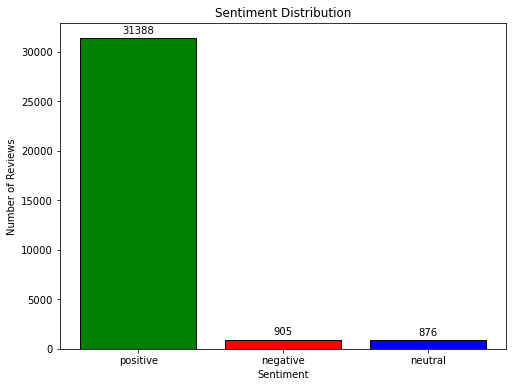

In [21]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load the dataset
language_reviews_path = 'spelling_corrected_reviews.csv'
language_custom_2 = pd.read_csv(language_reviews_path)

# Fix the column name
language_custom_2.rename(columns=lambda x: x.strip(), inplace=True)

# Function to clean text and remove stop words
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lower case
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stop words
    return ' '.join(words)

# Apply text cleaning
language_custom_2['processed_comments'] = language_custom_2['comments'].apply(clean_text)

# Custom lexicon dictionary
custom_lexicon = {
    "good": 2.0,
    "bad": -2.0,
    "excellent": 3.0,
    "poor": -3.0,
    "amazing": 3.0,
    "awesome": 3.0,
    "fantastic": 3.0,
    "great": 2.5,
    "wonderful": 3.0,
    "love": 3.0,
    "perfect": 3.0,
    "superb": 3.0,
    "terrific": 3.0,
    "satisfactory": 1.5,
    "delightful": 2.5,
    "happy": 2.0,
    "pleased": 2.0,
    "excellent service": 3.5,
    "highly recommend": 3.5,
    "top-notch": 3.0,
    "terrible": -3.0,
    "awful": -3.0,
    "horrible": -3.0,
    "disgusting": -3.0,
    "hate": -3.0,
    "unacceptable": -2.5,
    "disappointing": -2.0,
    "poor service": -3.5,
    "not recommend": -3.0,
    "waste": -2.5,
    "regret": -2.5,
    "bad experience": -3.0,
    "never again": -3.0,
    "frustrating": -2.0,
    "worst": -3.0,
    "average": 0.0,
    "ok": 0.0,
    "mediocre": -0.5,
    "sufficient": 0.5,
    # Add more words/phrases as needed
}

# Function to update VADER lexicon
def update_vader_lexicon():
    vader_lexicon = SentimentIntensityAnalyzer().lexicon
    vader_lexicon.update(custom_lexicon)
    return SentimentIntensityAnalyzer()

# Initialize the updated VADER sentiment analyzer
sid = update_vader_lexicon()

# Function to classify comments as positive, negative, or neutral using VADER
def classify_sentiment_vader(text):
    score = sid.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment analysis to the reviews DataFrame
language_custom_2['sentiment'] = language_custom_2['processed_comments'].apply(classify_sentiment_vader)

# Count how many reviews are positive, negative, and neutral
sentiment_counts = language_custom_2['sentiment'].value_counts()

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'], edgecolor='black')

# Add count labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                 textcoords="offset points", ha='center', va='bottom')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


**Measuring Performance**
To determine which tool works better for your dataset, you can use the following evaluation metrics:

**Accuracy:** The proportion of correctly classified instances among the total instances.

**Precision, Recall, and F1 Score:** Precision is the number of true positive results divided by the number of all positive results (including those not identified correctly). Recall is the number of true positive results divided by the number of positives that should have been retrieved. The F1 score is the harmonic mean of precision and recall.

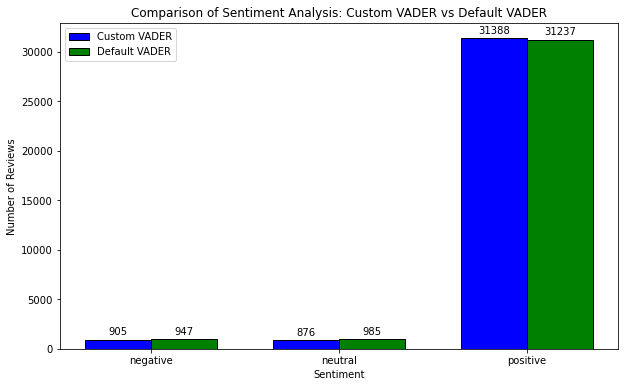

In [20]:
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Function to classify sentiment using a given VADER analyzer
def classify_sentiment_vader(text, analyzer):
    score = analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply custom VADER sentiment analysis using language_custom_2
language_custom_2['custom_sentiment'] = language_custom_2['processed_comments'].apply(lambda x: classify_sentiment_vader(x, sid))

# Apply default VADER sentiment analysis using language_reviews_df
language_reviews_df['default_sentiment'] = language_reviews_df['processed_comments'].apply(lambda x: classify_sentiment_vader(x, SentimentIntensityAnalyzer()))

# Count how many reviews are positive, negative, and neutral for both custom and default VADER
custom_sentiment_counts = language_custom_2['custom_sentiment'].value_counts()
default_sentiment_counts = language_reviews_df['default_sentiment'].value_counts()

# Create a DataFrame to combine both counts
sentiment_comparison_df = pd.DataFrame({
    'custom': custom_sentiment_counts,
    'default': default_sentiment_counts
}).fillna(0)  # Fill NaN values with 0

# Convert index to numeric values
index = range(len(sentiment_comparison_df))

# Plot the comparison
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35

# Plot bars for custom lexicon
bars1 = ax.bar([i - bar_width/2 for i in index], sentiment_comparison_df['custom'], bar_width, label='Custom VADER', color='blue', edgecolor='black')

# Plot bars for default lexicon
bars2 = ax.bar([i + bar_width/2 for i in index], sentiment_comparison_df['default'], bar_width, label='Default VADER', color='green', edgecolor='black')

# Add count labels on top of the bars
for bar1, bar2 in zip(bars1, bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{int(height1)}', xy=(bar1.get_x() + bar1.get_width() / 2, height1), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
    ax.annotate(f'{int(height2)}', xy=(bar2.get_x() + bar2.get_width() / 2, height2), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

ax.set_title('Comparison of Sentiment Analysis: Custom VADER vs Default VADER')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
ax.set_xticks(index)
ax.set_xticklabels(sentiment_comparison_df.index)
ax.legend()

plt.show()


In [15]:
# Find examples where custom and default VADER lexicons interpret the sentiment differently
mismatched_reviews = language_custom_2[language_custom_2['custom_sentiment'] != language_reviews_df['default_sentiment']]

# Display a sample of mismatched reviews
sample_mismatched_reviews = mismatched_reviews[['comments', 'processed_comments', 'custom_sentiment']]
sample_mismatched_reviews['default_sentiment'] = language_reviews_df['default_sentiment']

print("Sample of reviews with different sentiment interpretations:")
sample_mismatched_reviews.head(10)  # Display the first 10 examples



Sample of reviews with different sentiment interpretations:


/var/folders/yn/4vcq2czj6gd0jk1wttk_vj1h0000gn/T/ipykernel_42693/3988864200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_mismatched_reviews['default_sentiment'] = language_reviews_df['default_sentiment']


,comments,processed_comments,custom_sentiment,default_sentiment
130,very suitable accommodation to spend a few day...,suitable accommodation spend days onion also w...,positive,neutral
164,the stay went well,stay went well,positive,neutral
175,bores was always attentive to us upon arrival ...,bores always attentive us upon arrival departu...,neutral,negative
612,this is an ex council house in a block of flat...,ex council house block flats neighborhood bit ...,positive,negative
638,there was a problem with the window which let ...,problem window let bit air think unavoidable p...,neutral,negative
693,alley top,alley top,positive,neutral
991,the flat is extremely located very close to an...,flat extremely located close underground stati...,positive,neutral
1010,correct apartment for a short stay area away f...,correct apartment short stay area away center ...,positive,neutral
1143,very practical apartment for families and well...,practical apartment families well located well...,positive,neutral
1231,well placed and comfy flat,well placed comfy flat,positive,neutral


## Default VADER

VADER Sentiment Distribution:
positive    93.635624
negative     4.000724
neutral      2.363653
Name: vader_sentiment, dtype: float64


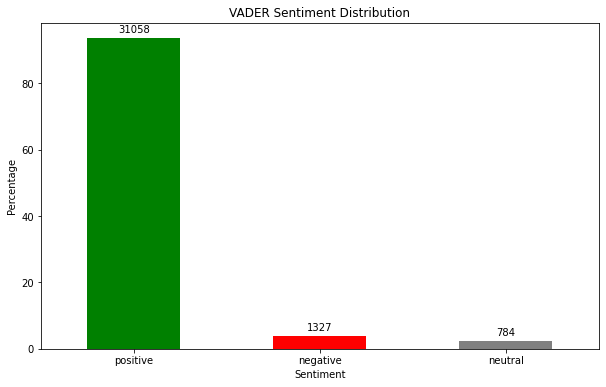

In [54]:
# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment_vader(text):
    score = vader_analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
language_reviews_df['vader_sentiment'] = language_reviews_df['comments'].apply(classify_sentiment_vader)

# Calculate the distribution of sentiments
vader_sentiment_counts = language_reviews_df['vader_sentiment'].value_counts()
vader_sentiment_distribution = vader_sentiment_counts / len(language_reviews_df) * 100
print("VADER Sentiment Distribution:")
print(vader_sentiment_distribution)

# Plotting the distribution as a bar chart
plt.figure(figsize=(10, 6))
bar_plot = vader_sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])

# Add annotations
for i, count in enumerate(vader_sentiment_counts):
    percentage = vader_sentiment_distribution[i]
    bar_plot.text(i, percentage + 1, f'{int(count)}', ha='center', va='bottom')

plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

## Default Textblob

TextBlob Sentiment Distribution:
positive    93.379360
neutral      4.594652
negative     2.025988
Name: textblob_sentiment, dtype: float64


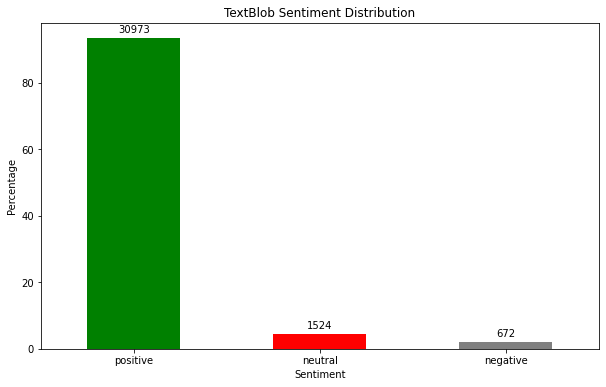

In [55]:
# TextBlob Sentiment Analysis
# Function to classify sentiment using TextBlob
def classify_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.05:
        return 'positive'
    elif analysis.sentiment.polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply TextBlob sentiment analysis
language_reviews_df['textblob_sentiment'] = language_reviews_df['comments'].apply(classify_sentiment_textblob)

# Calculate the distribution of sentiments
textblob_sentiment_counts = language_reviews_df['textblob_sentiment'].value_counts()
textblob_sentiment_distribution = textblob_sentiment_counts / len(language_reviews_df) * 100
print("TextBlob Sentiment Distribution:")
print(textblob_sentiment_distribution)

# Plotting the TextBlob sentiment distribution as a bar chart
plt.figure(figsize=(10, 6))
bar_plot_textblob = textblob_sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])

# Add annotations for TextBlob
for i, count in enumerate(textblob_sentiment_counts):
    percentage = textblob_sentiment_distribution[i]
    bar_plot_textblob.text(i, percentage + 1, f'{int(count)}', ha='center', va='bottom')

plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


### Comparison of VADER and Textblob

  Sentiment  VADER_Percentage  VADER_Count  TextBlob_Percentage  \
0  positive         93.635624        31058            93.379360   
1  negative          4.000724         1327             2.025988   
2   neutral          2.363653          784             4.594652   

   TextBlob_Count  
0           30973  
1             672  
2            1524  


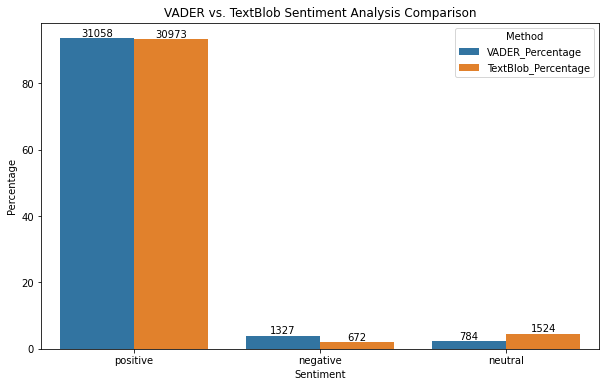

In [65]:
# Combine the distributions into a single DataFrame
comparison_df = pd.DataFrame({
    'Sentiment': ['positive', 'negative', 'neutral'],
    'VADER_Percentage': vader_sentiment_distribution.reindex(['positive', 'negative', 'neutral'], fill_value=0).values,
    'VADER_Count': vader_sentiment_counts.reindex(['positive', 'negative', 'neutral'], fill_value=0).values,
    'TextBlob_Percentage': textblob_sentiment_distribution.reindex(['positive', 'negative', 'neutral'], fill_value=0).values,
    'TextBlob_Count': textblob_sentiment_counts.reindex(['positive', 'negative', 'neutral'], fill_value=0).values
})

# Print the combined DataFrame for verification
print(comparison_df)

# Melt the DataFrame for easier plotting with seaborn
comparison_melted_df = comparison_df.melt(id_vars='Sentiment', value_vars=['VADER_Percentage', 'TextBlob_Percentage'], var_name='Method', value_name='Percentage')

# Plot the comparison
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=comparison_melted_df, x='Sentiment', y='Percentage', hue='Method')

# Add annotations for counts
for i, bar in enumerate(bar_plot.patches):
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x() + width / 2
    method = 'VADER_Count' if 'VADER' in bar_plot.get_legend().get_texts()[i // 3].get_text() else 'TextBlob_Count'
    sentiment_label = bar_plot.get_xticklabels()[i % 3].get_text()
    count = comparison_df.loc[comparison_df['Sentiment'] == sentiment_label, method].values[0]
    bar_plot.annotate(f'{int(count)}', (x, height), ha='center', va='bottom')

plt.title('VADER vs. TextBlob Sentiment Analysis Comparison')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

In [71]:
# Filter reviews where VADER sentiment is positive and TextBlob sentiment is not positive
vader_positive_textblob_not_positive = language_reviews_df[
    (language_reviews_df['vader_sentiment'] == 'positive') & 
    (language_reviews_df['textblob_sentiment'] != 'positive')
]

# Display the first 10 examples of such reviews
print("Examples of reviews that VADER analyzed as positive but TextBlob didn't:\n")
for index, row in vader_positive_textblob_not_positive.head(10).iterrows():
    print(f"Review {index + 1}: {row['comments']}")
    print(f"VADER Sentiment: {row['vader_sentiment']}")
    print(f"TextBlob Sentiment: {row['textblob_sentiment']}\n")


Examples of reviews that VADER analyzed as positive but TextBlob didn't:

Review 96: like i
VADER Sentiment: positive
TextBlob Sentiment: neutral

Review 119: bathroom needs a deep clean and bed could do with a new mattress as it was really uncomfortable to sleep on room is small but good location and not too expensive for onion
VADER Sentiment: positive
TextBlob Sentiment: neutral

Review 128: i recommend
VADER Sentiment: positive
TextBlob Sentiment: neutral

Review 154: correct apartment near the metro station well located from the center cares around the apartment quiet zone
VADER Sentiment: positive
TextBlob Sentiment: neutral

Review 165: the stay went well
VADER Sentiment: positive
TextBlob Sentiment: neutral

Review 179: small apartment but that all we needed excellent base for exploring onion metro stations can be walked within 5 minutes next time i would book this apartment again
VADER Sentiment: positive
TextBlob Sentiment: neutral

Review 307: the room and accommodation conf

In [72]:
# Filter reviews where TextBlob sentiment is negative and VADER sentiment is positive
textblob_negative_vader_positive = language_reviews_df[
    (language_reviews_df['textblob_sentiment'] == 'negative') & 
    (language_reviews_df['vader_sentiment'] == 'positive')
]

# Display the first 10 examples of such reviews
print("Examples of reviews that TextBlob analyzed as negative but VADER analyzed as positive:\n")
for index, row in textblob_negative_vader_positive.head(10).iterrows():
    print(f"Review {index + 1}: {row['comments']}")
    print(f"TextBlob Sentiment: {row['textblob_sentiment']}")
    print(f"VADER Sentiment: {row['vader_sentiment']}\n")


Examples of reviews that TextBlob analyzed as negative but VADER analyzed as positive:

Review 531: it was a quiet place to live when someone travels in onion you may need to take some time to find the key its like a game of puzzle hah
TextBlob Sentiment: negative
VADER Sentiment: positive

Review 1019: staying in onion feels very expensive at the moment but annals place being so close but also in a quiet area is a little oasis to come back to definitely would stay here again
TextBlob Sentiment: negative
VADER Sentiment: positive

Review 1385: the bathroom was spotless but it is very uncomfortable to bathe because you have to do it crouching or sitting on the attic the rest is as advertised and very comfortable
TextBlob Sentiment: negative
VADER Sentiment: positive

Review 1557: the place was not too bad but it was not the one i booked they changed it to another one it was below my expectations
TextBlob Sentiment: negative
VADER Sentiment: positive

Review 1936: read the fine print ren

In [18]:
# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment_vader(text):
    score = vader_analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Automatically label the data using VADER
language_reviews_df['true_sentiment'] = language_reviews_df['comments'].apply(classify_sentiment_vader)

# Save the labeled dataset
language_reviews_df.to_csv('labeled_data_vader.csv', index=False)

# Output the file path
print(f"Labeled data saved to: labeled_data_vader.csv")

Labeled data saved to: labeled_data_vader.csv


In [46]:
# Load the automatically labeled data
labeled_data_path = 'labeled_data_vader.csv'
labeled_df = pd.read_csv(labeled_data_path)

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using TextBlob
def classify_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.05:
        return 'positive'
    elif analysis.sentiment.polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis again (for comparison consistency)
def classify_sentiment_vader(text):
    score = vader_analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

labeled_df['vader_sentiment'] = labeled_df['comments'].apply(classify_sentiment_vader)
# Apply TextBlob sentiment analysis
labeled_df['textblob_sentiment'] = labeled_df['comments'].apply(classify_sentiment_textblob)

# Evaluate VADER
vader_cm = confusion_matrix(labeled_df['true_sentiment'], labeled_df['vader_sentiment'], labels=['positive', 'negative', 'neutral'])
vader_accuracy = accuracy_score(labeled_df['true_sentiment'], labeled_df['vader_sentiment'])
vader_precision = precision_score(labeled_df['true_sentiment'], labeled_df['vader_sentiment'], labels=['positive', 'negative', 'neutral'], average=None)
vader_recall = recall_score(labeled_df['true_sentiment'], labeled_df['vader_sentiment'], labels=['positive', 'negative', 'neutral'], average=None)
vader_f1 = f1_score(labeled_df['true_sentiment'], labeled_df['vader_sentiment'], labels=['positive', 'negative', 'neutral'], average=None)

# Evaluate TextBlob
textblob_cm = confusion_matrix(labeled_df['true_sentiment'], labeled_df['textblob_sentiment'], labels=['positive', 'negative', 'neutral'])
textblob_accuracy = accuracy_score(labeled_df['true_sentiment'], labeled_df['textblob_sentiment'])
textblob_precision = precision_score(labeled_df['true_sentiment'], labeled_df['textblob_sentiment'], labels=['positive', 'negative', 'neutral'], average=None)
textblob_recall = recall_score(labeled_df['true_sentiment'], labeled_df['textblob_sentiment'], labels=['positive', 'negative', 'neutral'], average=None)
textblob_f1 = f1_score(labeled_df['true_sentiment'], labeled_df['textblob_sentiment'], labels=['positive', 'negative', 'neutral'], average=None)

# Prepare data for the dataframe
data = {
    'Precision': [
        vader_precision[1], vader_precision[0], vader_precision[2],
        textblob_precision[1], textblob_precision[0], textblob_precision[2]
    ],
    'Recall': [
        vader_recall[1], vader_recall[0], vader_recall[2],
        textblob_recall[1], textblob_recall[0], textblob_recall[2]
    ],
    'F1 Score': [
        vader_f1[1], vader_f1[0], vader_f1[2],
        textblob_f1[1], textblob_f1[0], textblob_f1[2]
    ],
    'Accuracy': [
        vader_accuracy, vader_accuracy, vader_accuracy,
        textblob_accuracy, textblob_accuracy, textblob_accuracy
    ]
}

# Create a MultiIndex for the dataframe
index = pd.MultiIndex.from_product([['VADER', 'TextBlob'], ['Negative', 'Positive', 'Neutral']], names=['Model', 'Sentiment'])

# Create the dataframe
df_metrics = pd.DataFrame(data, index=index)

# Print accuracy for each method
print(f"VADER Accuracy: {vader_accuracy}")
print(f"TextBlob Accuracy: {textblob_accuracy}")

# Visualize metrics DataFrame 
df_metrics_display = df_metrics.reset_index()
df_metrics_display.columns = ['Model', 'Sentiment', 'Precision', 'Recall', 'F1 Score', 'Accuracy']

# Display the DataFrame in a more readable format
df_metrics_display = df_metrics_display.set_index(['Model', 'Sentiment'])
df_metrics_display_styled = df_metrics_display.style.set_caption("Model Evaluation Metrics").background_gradient(cmap='coolwarm')

df_metrics_display


VADER Accuracy: 1.0
TextBlob Accuracy: 0.9404865989327384


Precision    Recall  F1 Score  Accuracy
Model    Sentiment                                         
VADER    Negative    1.000000  1.000000  1.000000  1.000000
         Positive    1.000000  1.000000  1.000000  1.000000
         Neutral     1.000000  1.000000  1.000000  1.000000
TextBlob Negative    0.702381  0.355690  0.472236  0.940487
         Positive    0.977852  0.975175  0.976512  0.940487
         Neutral     0.286089  0.556122  0.377816  0.940487

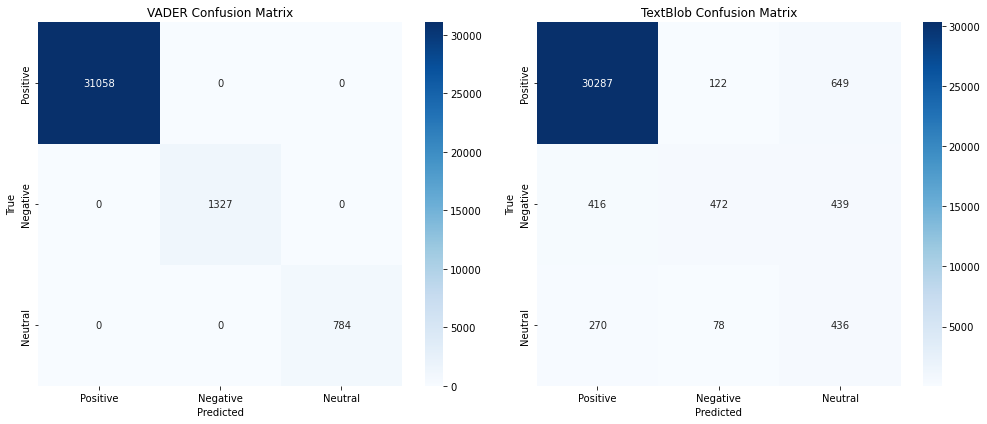

In [45]:
# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(vader_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'], ax=ax[0])
ax[0].set_title('VADER Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(textblob_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'], ax=ax[1])
ax[1].set_title('TextBlob Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()

In [21]:
# Function to classify sentiment using TextBlob
def classify_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.05:
        return 'positive'
    elif analysis.sentiment.polarity < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Automatically label the data using TextBlob
language_reviews_df['true_sentiment'] = language_reviews_df['comments'].apply(classify_sentiment_textblob)

# Save the labeled dataset
language_reviews_df.to_csv('labeled_data_textblob.csv', index=False)

# Output the file path
print(f"Labeled data saved to: labeled_data_textblob.csv")

Labeled data saved to: labeled_data_textblob.csv


In [37]:
# Load the automatically labeled data
labeled_data_path = 'labeled_data_textblob.csv'
labeled_df = pd.read_csv(labeled_data_path)

# Initialize VADER sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment using VADER
def classify_sentiment_vader(text):
    score = vader_analyzer.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'positive'
    elif score['compound'] < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis
labeled_df['vader_sentiment'] = labeled_df['comments'].apply(classify_sentiment_vader)

# Reuse TextBlob classifications as already calculated for true_sentiment
labeled_df['textblob_sentiment'] = labeled_df['true_sentiment']

# Evaluate VADER
vader_report = classification_report(labeled_df['true_sentiment'], labeled_df['vader_sentiment'], labels=['positive', 'negative', 'neutral'], output_dict=True)
vader_accuracy = accuracy_score(labeled_df['true_sentiment'], labeled_df['vader_sentiment'])

# Evaluate TextBlob
textblob_report = classification_report(labeled_df['true_sentiment'], labeled_df['textblob_sentiment'], labels=['positive', 'negative', 'neutral'], output_dict=True)
textblob_accuracy = accuracy_score(labeled_df['true_sentiment'], labeled_df['textblob_sentiment'])

# Prepare data for the dataframe
data = {
    'Precision': [
        vader_report['negative']['precision'], vader_report['positive']['precision'], vader_report['neutral']['precision'],
        textblob_report['negative']['precision'], textblob_report['positive']['precision'], textblob_report['neutral']['precision']
    ],
    'Recall': [
        vader_report['negative']['recall'], vader_report['positive']['recall'], vader_report['neutral']['recall'],
        textblob_report['negative']['recall'], textblob_report['positive']['recall'], textblob_report['neutral']['recall']
    ],
    'F1 Score': [
        vader_report['negative']['f1-score'], vader_report['positive']['f1-score'], vader_report['neutral']['f1-score'],
        textblob_report['negative']['f1-score'], textblob_report['positive']['f1-score'], textblob_report['neutral']['f1-score']
    ],
    'Accuracy': [
        vader_accuracy, vader_accuracy, vader_accuracy,
        textblob_accuracy, textblob_accuracy, textblob_accuracy
    ]
}

# Create a MultiIndex for the dataframe
index = pd.MultiIndex.from_product([['VADER', 'TextBlob'], ['Negative', 'Positive', 'Neutral']], names=['Model', 'Sentiment'])

# Create the dataframe
df_metrics = pd.DataFrame(data, index=index)
df_metrics

# Print accuracy for each method
print(f"VADER Accuracy: {vader_accuracy}")
print(f"TextBlob Accuracy: {textblob_accuracy}")

# Display the dataframe
df_metrics

VADER Accuracy: 0.9404865989327384
TextBlob Accuracy: 1.0


Precision    Recall  F1 Score  Accuracy
Model    Sentiment                                         
VADER    Negative    0.355690  0.702381  0.472236  0.940487
         Positive    0.975175  0.977852  0.976512  0.940487
         Neutral     0.556122  0.286089  0.377816  0.940487
TextBlob Negative    1.000000  1.000000  1.000000  1.000000
         Positive    1.000000  1.000000  1.000000  1.000000
         Neutral     1.000000  1.000000  1.000000  1.000000

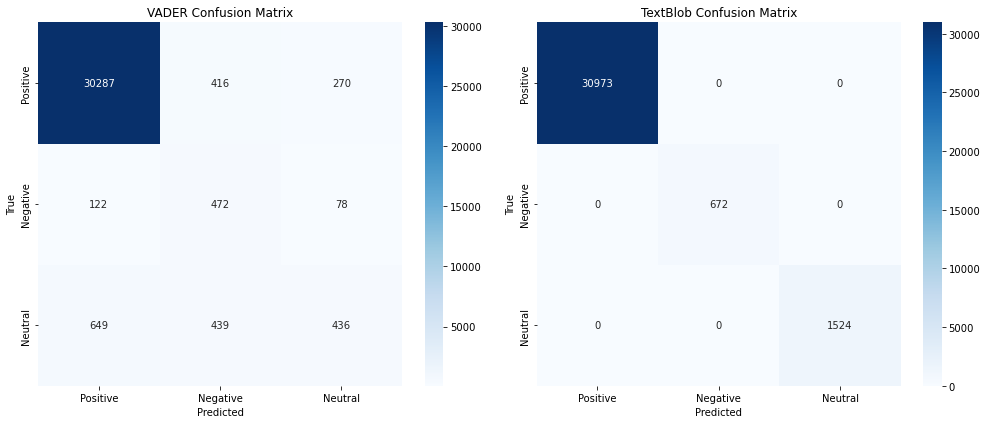

In [26]:
# Evaluate VADER
vader_cm = confusion_matrix(labeled_df['true_sentiment'], labeled_df['vader_sentiment'], labels=['positive', 'negative', 'neutral'])

# Evaluate TextBlob (reuse the 'true_sentiment' column as the predictions)
textblob_cm = confusion_matrix(labeled_df['true_sentiment'], labeled_df['textblob_sentiment'], labels=['positive', 'negative', 'neutral'])

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(vader_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'], ax=ax[0])
ax[0].set_title('VADER Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(textblob_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'], ax=ax[1])
ax[1].set_title('TextBlob Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()

In [28]:
# Load the labeled datasets
textblob_data_path = 'labeled_data_textblob.csv'
vader_data_path = 'labeled_data_vader.csv'

textblob_df = pd.read_csv(textblob_data_path)
vader_df = pd.read_csv(vader_data_path)

# Strip leading/trailing spaces from column names
textblob_df.columns = textblob_df.columns.str.strip()
vader_df.columns = vader_df.columns.str.strip()

# Merge the DataFrames on common columns (e.g., 'comments')
combined_df = pd.merge(textblob_df, vader_df, on='comments', suffixes=('_textblob', '_vader'))


# Save the combined DataFrame to a new CSV file
combined_data_path = 'combined_labeled_data.csv'
combined_df.to_csv(combined_data_path, index=False)

# Output the file path
print(f"Combined data saved to: {combined_data_path}")

Combined data saved to: combined_labeled_data.csv


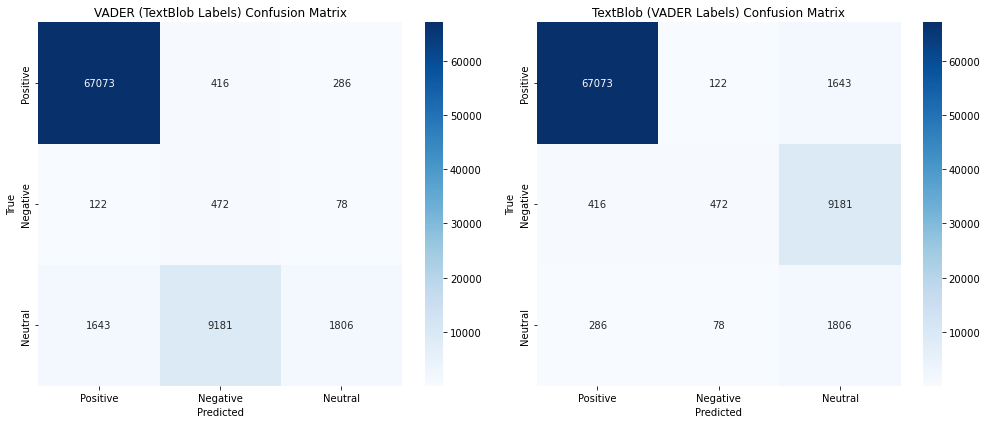

In [30]:
# Load the labeled data
labeled_data_path = 'combined_labeled_data.csv'
labeled_df = pd.read_csv(labeled_data_path)

# Evaluate VADER using TextBlob true labels
vader_report_textblob_labels = classification_report(labeled_df['true_sentiment_textblob'], labeled_df['true_sentiment_vader'], labels=['positive', 'negative', 'neutral'], output_dict=True)
vader_cm_textblob_labels = confusion_matrix(labeled_df['true_sentiment_textblob'], labeled_df['true_sentiment_vader'], labels=['positive', 'negative', 'neutral'])

# Evaluate TextBlob using VADER true labels
textblob_report_vader_labels = classification_report(labeled_df['true_sentiment_vader'], labeled_df['true_sentiment_textblob'], labels=['positive', 'negative', 'neutral'], output_dict=True)
textblob_cm_vader_labels = confusion_matrix(labeled_df['true_sentiment_vader'], labeled_df['true_sentiment_textblob'], labels=['positive', 'negative', 'neutral'])

# Prepare data for the dataframe
data_textblob_labels = {
    'Precision': [
        vader_report_textblob_labels['negative']['precision'], vader_report_textblob_labels['positive']['precision'], vader_report_textblob_labels['neutral']['precision'],
        textblob_report_vader_labels['negative']['precision'], textblob_report_vader_labels['positive']['precision'], textblob_report_vader_labels['neutral']['precision']
    ],
    'Recall': [
        vader_report_textblob_labels['negative']['recall'], vader_report_textblob_labels['positive']['recall'], vader_report_textblob_labels['neutral']['recall'],
        textblob_report_vader_labels['negative']['recall'], textblob_report_vader_labels['positive']['recall'], textblob_report_vader_labels['neutral']['recall']
    ],
    'F1 Score': [
        vader_report_textblob_labels['negative']['f1-score'], vader_report_textblob_labels['positive']['f1-score'], vader_report_textblob_labels['neutral']['f1-score'],
        textblob_report_vader_labels['negative']['f1-score'], textblob_report_vader_labels['positive']['f1-score'], textblob_report_vader_labels['neutral']['f1-score']
    ]
}

# Create a MultiIndex for the dataframe
index_textblob_labels = pd.MultiIndex.from_product([['VADER (TextBlob Labels)', 'TextBlob (VADER Labels)'], ['Negative', 'Positive', 'Neutral']], names=['Model', 'Sentiment'])

# Create the dataframe
df_metrics_textblob_labels = pd.DataFrame(data_textblob_labels, index=index_textblob_labels)

df_metrics_textblob_labels

# Plot confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(vader_cm_textblob_labels, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'], ax=ax[0])
ax[0].set_title('VADER (TextBlob Labels) Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(textblob_cm_vader_labels, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'], ax=ax[1])
ax[1].set_title('TextBlob (VADER Labels) Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()

**Cross-validation**

- VADER and TextBlob generally agree on positive sentiment but differ significantly on negative and neutral classifications.

- TextBlob shows a higher precision for negative sentiment when evaluated against VADER labels, while VADER shows higher precision for positive sentiment when evaluated against TextBlob labels.

- The differences in classifying neutral and negative sentiments suggest that combining both tools or using a different method for neutral/negative classification might improve overall sentiment analysis performance.

### Combining VADER and Textblob 'true_sentiment'

The purpose of this code is to generate a combined "true sentiment" label for each comment in the dataset by integrating the sentiment classifications from both VADER and TextBlob sentiment analysis tools. This combined label can be used as a more reliable ground truth for further analysis and evaluation.

(ex. Imagine you have a dataset of customer reviews for a product. Both VADER and TextBlob are used to analyze the sentiments of these reviews. However, the tools might sometimes disagree on the sentiment. By combining their outputs into a single true_sentiment label, you can create a dataset with more reliable sentiment labels. This dataset can then be used to evaluate the performance of new sentiment analysis models, understand customer feedback more accurately, and make informed business decisions.) 

In [32]:
# Load the labeled data
labeled_data_path = 'combined_labeled_data.csv'
labeled_df_1 = pd.read_csv(labeled_data_path)

# Function to create a true sentiment label by combining VADER and TextBlob labels
def combine_sentiments(vader, textblob):
    if vader == textblob:
        return vader
    else:
        return 'neutral'  # If they disagree, set as neutral

# Apply the function to create the true_sentiment column
labeled_df_1['true_sentiment'] = labeled_df_1.apply(lambda row: combine_sentiments(row['true_sentiment_vader'], row['true_sentiment_textblob']), axis=1)

# Save the updated DataFrame
combined_data_path = 'combined_labeled_data_with_true_sentiment.csv'
labeled_df_1.to_csv(combined_data_path, index=False)

# Output the file path
print(f"Updated combined data saved to: {combined_data_path}")

Updated combined data saved to: combined_labeled_data_with_true_sentiment.csv


In [36]:
# Evaluate VADER using the true sentiment labels
vader_report = classification_report(labeled_df_1['true_sentiment'], labeled_df_1['true_sentiment_vader'], labels=['positive', 'negative', 'neutral'], output_dict=True)
vader_cm = confusion_matrix(labeled_df_1['true_sentiment'], labeled_df_1['true_sentiment_vader'], labels=['positive', 'negative', 'neutral'])

# Evaluate TextBlob using the true sentiment labels
textblob_report = classification_report(labeled_df_1['true_sentiment'], labeled_df_1['true_sentiment_textblob'], labels=['positive', 'negative', 'neutral'], output_dict=True)
textblob_cm = confusion_matrix(labeled_df_1['true_sentiment'], labeled_df_1['true_sentiment_textblob'], labels=['positive', 'negative', 'neutral'])

# Prepare data for the dataframe
data = {
    'Precision': [
        vader_report['negative']['precision'], vader_report['positive']['precision'], vader_report['neutral']['precision'],
        textblob_report['negative']['precision'], textblob_report['positive']['precision'], textblob_report['neutral']['precision']
    ],
    'Recall': [
        vader_report['negative']['recall'], vader_report['positive']['recall'], vader_report['neutral']['recall'],
        textblob_report['negative']['recall'], textblob_report['positive']['recall'], textblob_report['neutral']['recall']
    ],
    'F1 Score': [
        vader_report['negative']['f1-score'], vader_report['positive']['f1-score'], vader_report['neutral']['f1-score'],
        textblob_report['negative']['f1-score'], textblob_report['positive']['f1-score'], textblob_report['neutral']['f1-score']
    ]
}

# Create a MultiIndex for the dataframe
index = pd.MultiIndex.from_product([['VADER', 'TextBlob'], ['Negative', 'Positive', 'Neutral']], names=['Model', 'Sentiment'])

# Create the dataframe
df_metrics = pd.DataFrame(data, index=index)

df_metrics


Precision    Recall  F1 Score
Model    Sentiment                               
VADER    Negative    0.046877  1.000000  0.089555
         Positive    0.974360  1.000000  0.987014
         Neutral     1.000000  0.160361  0.276398
TextBlob Negative    0.702381  1.000000  0.825175
         Positive    0.989642  1.000000  0.994794
         Neutral     1.000000  0.933343  0.965523

**Interpretation of the Results**

- **Precision, Recall, and F1 Score:** The table shows these metrics for each sentiment class (Negative, Positive, Neutral) for both VADER and TextBlob.

- **Negative Sentiment:** VADER shows a very low precision (0.046877), indicating a high number of false positives, but a perfect recall (1.000000), meaning all actual negative cases were identified. TextBlob shows more balanced precision and recall for negative sentiment.

- **Positive Sentiment:** Both VADER and TextBlob have high precision and recall, with TextBlob performing slightly better.

- **Neutral Sentiment:** TextBlob significantly outperforms VADER in classifying neutral sentiment, as seen in the higher precision and recall.

**Conclusion**

The combined true sentiment labels provide a balanced ground truth for evaluating both VADER and TextBlob. This method allows for a fair comparison of their performance and helps identify areas for improvement in sentiment analysis models. The results suggest that while both tools perform well for positive sentiments, **TextBlob has a clear advantage in classifying negative and neutral sentiments accurately.**

## NER

In [2]:
import spacy
from collections import Counter
import pandas as pd

# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")

# Example text data
reviews = language_reviews_df['comments']

# Apply NER to the text data
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

language_reviews_df['entities'] = reviews.apply(extract_entities)

# Display the DataFrame with extracted entities
print(language_reviews_df[['comments', 'entities']].head())


NameError: name 'language_reviews_df' is not defined

In [67]:
# Flatten the list of entities and count their frequency
entities_list = [entity for entities in language_reviews_df['entities'] for entity in entities]
entity_counter = Counter(entities_list)

# Convert to DataFrame for better visualization
entities_df = pd.DataFrame(entity_counter.items(), columns=['Entity', 'Count']).sort_values(by='Count', ascending=False)

# Display the top entities
print(entities_df.head(10))


                   Entity  Count
1         (two, CARDINAL)   1299
0           (2, CARDINAL)   1220
175       (one, CARDINAL)    985
7        (first, ORDINAL)    711
58           (metro, FAC)    689
14          (5, CARDINAL)    665
20          (3, CARDINAL)    639
21          (4, CARDINAL)    605
18          (night, TIME)    494
2112  (marijuana, PERSON)    378


In [68]:
# Separate reviews into positive and negative
positive_reviews = language_reviews_df[language_reviews_df['vader_sentiment'] == 'positive']
negative_reviews = language_reviews_df[language_reviews_df['vader_sentiment'] == 'negative']

# Extract entities for positive and negative reviews
positive_entities = [entity for entities in positive_reviews['entities'] for entity in entities]
negative_entities = [entity for entities in negative_reviews['entities'] for entity in entities]

# Count the frequency of entities
positive_entity_counter = Counter(positive_entities)
negative_entity_counter = Counter(negative_entities)

# Convert to DataFrame for better visualization
positive_entities_df = pd.DataFrame(positive_entity_counter.items(), columns=['Entity', 'Count']).sort_values(by='Count', ascending=False)
negative_entities_df = pd.DataFrame(negative_entity_counter.items(), columns=['Entity', 'Count']).sort_values(by='Count', ascending=False)

# Display the top entities in positive and negative reviews
print("Top entities in positive reviews:")
print(positive_entities_df.head(10))
print("\nTop entities in negative reviews:")
print(negative_entities_df.head(10))


Top entities in positive reviews:
                   Entity  Count
1         (two, CARDINAL)   1177
0           (2, CARDINAL)   1099
161       (one, CARDINAL)    852
55           (metro, FAC)    652
14          (5, CARDINAL)    624
7        (first, ORDINAL)    612
20          (3, CARDINAL)    570
21          (4, CARDINAL)    530
18          (night, TIME)    453
1929  (marijuana, PERSON)    373

Top entities in negative reviews:
               Entity  Count
58    (one, CARDINAL)    116
33      (2, CARDINAL)    110
23    (two, CARDINAL)    105
11   (first, ORDINAL)     94
22      (4, CARDINAL)     67
59      (3, CARDINAL)     59
45      (1, CARDINAL)     40
29  (second, ORDINAL)     39
7       (night, TIME)     39
18    (the day, DATE)     39


In [74]:
# Preprocess the text
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    return ' '.join(tokens)

language_reviews_df['cleaned_comments'] = language_reviews_df['comments'].apply(preprocess_text)


In [75]:
# Define time periods
pre_brexit = (language_reviews_df['date'] < '2016-06-23')
during_brexit = (language_reviews_df['date'] >= '2016-06-23') & (language_reviews_df['date'] <= '2020-01-31')
pre_covid = (language_reviews_df['date'] > '2020-01-31') & (language_reviews_df['date'] < '2020-03-11')
during_covid = (language_reviews_df['date'] >= '2020-03-11') & (language_reviews_df['date'] <= '2021-12-31')
post_covid = (language_reviews_df['date'] > '2021-12-31')

language_reviews_df['period'] = 'post_covid'
language_reviews_df.loc[pre_brexit, 'period'] = 'pre_brexit'
language_reviews_df.loc[during_brexit, 'period'] = 'during_brexit'
language_reviews_df.loc[pre_covid, 'period'] = 'pre_covid'
language_reviews_df.loc[during_covid, 'period'] = 'during_covid'

# Calculate sentiment distribution for each period
period_sentiment_distribution = language_reviews_df.groupby('period')['vader_sentiment'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Sentiment Distribution by Period:")
print(period_sentiment_distribution)

Sentiment Distribution by Period:
vader_sentiment  negative   neutral   positive
period                                        
during_brexit    3.225806  2.441151  94.333043
during_covid     3.859649  2.807018  93.333333
post_covid       4.188863  2.353122  93.458016
pre_brexit       0.654664  0.490998  98.854337
pre_covid        5.172414  1.724138  93.103448
